In [17]:
import requests
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import cycle
import numpy as np

In [56]:
def Convert(string): 
    """ Function converts text extracted from livejournal website into list. """
    string.replace('<', '>')
    li = list(string.split("\n>")) 
    return li

In [57]:
def fun(user):
    """ Function fetches a list of 10 friends of a user from livejournal website. """

    url = "https://www.livejournal.com/misc/fdata.bml?user={}".format(user)
    r = requests.get(url)
    text = r.text
    new_text = Convert(text)
    list_of_friends = new_text[1:11]
    return list_of_friends

In [58]:
#test
fun("valerois")

[' bagira',
 ' angerona',
 ' yankel',
 ' yelya',
 ' ponka',
 ' marinka',
 ' saper',
 ' levinius',
 ' monella',
 ' irbisa']

In [59]:
def friend_of_friend_graph(level):
    """ Function uses the snowball sampling method to map the social network.
    Parameter level is the depth of the search. 
    """
    
    G = nx.Graph()
    friends_of_valerois = fun("valerois") # obtaining valerois's friends
    G.add_nodes_from(friends_of_valerois)
    
    for f in list(G.nodes()):
        G.add_edge("valerois", f)
        
    G.add_node("valerois")
    
    friends_of_friends = {"valerois": friends_of_valerois} # making dictionary for nodes and their friends
                                                           # for now we have only one node in graph
    l = 1
    while l < level:
        l += 1
             
        added_keys = ["valerois"]
        
        for v in list(G.nodes()):
            if v not in friends_of_friends.keys():
                friends_of_friends[v] = fun(v) # adding new node (key) to the dictionary with friends (values)
    
        for k in friends_of_friends.keys():
            if k not in added_keys:
                G.add_node(k)
                added_keys.append(k)
                          
                for fof in friends_of_friends[k]:
                    G.add_edge(k,fof)
                 
    
    return G


In [115]:
# an example of third level
G = friend_of_friend_graph(3)

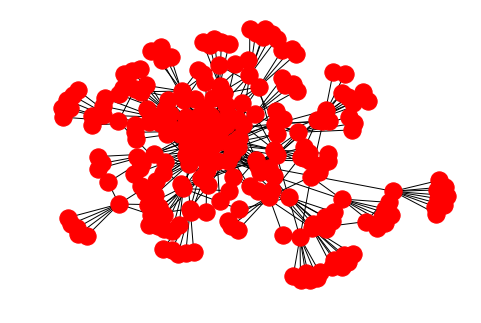

In [96]:
nx.draw(G, with_labels = False)
plt.show()

In [97]:
# an example of second level
H = friend_of_friend_graph(2)

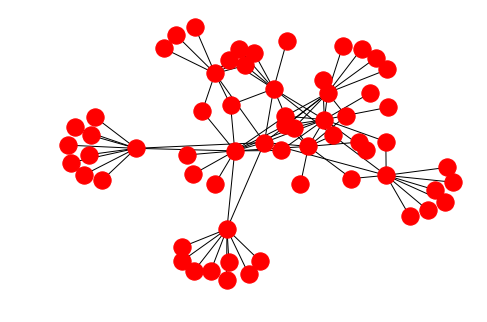

In [98]:
nx.draw(H, with_labels = False)
plt.show()

In [116]:
# saving the results into a file
nx.write_adjlist(H, "H.adjlist")

In [6]:
# opening saved network
fh = open("H.adjlist", 'rb')
H = nx.read_adjlist(fh)

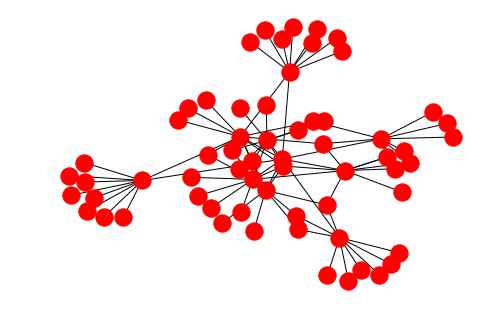

In [7]:
# let's chech if the network was saved correctly
nx.draw(H, with_labels = False)
plt.show()

In [53]:
def fun(H):
    """ Function gives the number of nodes and edges in the network,
    finds celebrity and plot the degree distribution.
    """
    
    list_of_nodes=list(G.nodes())
    list_of_edges=list(G.edges())
    print("Graph has {} nodes and {} edges".format(len(list_of_nodes), len(list_of_edges)))
    
    dict_of_degrees=nx.degree_centrality(G)
    value_of_celebrity = max(dict_of_degrees.values())
    celebrity = list(dict_of_degrees.keys())[list(dict_of_degrees.values()).index(value_of_celebrity)] 
    
    print("Celebrity of the network is {}".format(celebrity))
    
    list_of_deegres = nx.degree(G)
    x = list(dict(list_of_deegres).values())
    
    plt.figure(figsize = (9, 5))
    sns.distplot(x, hist = True)
    plt.title("Distribution of nodes degrees in the network", fontsize = 20)
    plt.show()

Graph has 63 nodes and 90 edges
Celebrity of the network is bagira


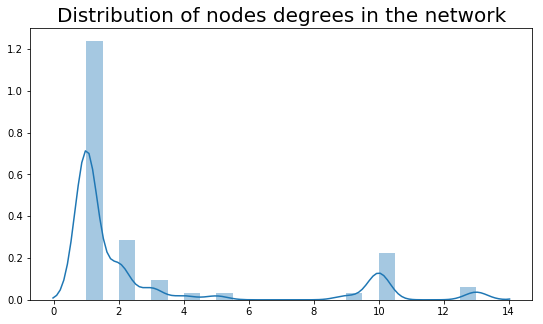

In [54]:
fun(G)